In [ ]:
import numpy as np
import sys
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# number of polynomial params in each individual:
N = 3
BLOCK_SIZE = 16

In [ ]:
def generate_first_population(count_parents):
    return [random.uniform(-1, 1) for i in range(count_parents * N)]

In [ ]:
def fitness(count, count_ind, children):
    fat_err, h = 0.0, 2 * np.pi / count
    arr_ind = []

    for i in range(count_ind):
        for j in range(count):
            err = 0.0
            for k in range(N):
                X = (j * h + h) ** k
                err += children[i * N + k] * X

            fat_err += (np.sin(j * h + h) - err) ** 2

        arr_ind.append(fat_err)
        fat_err = 0.0
    return arr_ind

In [ ]:
def select_best_parents(arr, count_individuals, count_parents, children):
    indexes = [0]
    arr_min = []
    bp = np.zeros(N * count_parents)

    for p in range(count_parents):
        arr_min.append(sys.float_info.max)

    for i in range(count_individuals):
        if arr[i] < arr_min[0]:
            arr_min[0] = arr[i]
            indexes[0] = i

    for p in range(1, count_parents):
        indexes.append(None)
        for i in range(count_individuals):
            if arr[i] > arr_min[p - 1] and arr[i] < arr_min[p]:
                arr_min[p] = arr[i]
                indexes[p] = i

    for i in range(count_parents):
        for j in range(N):
            bp[i * N + j] = children[indexes[i] * N + j]

    return indexes, bp


In [ ]:
def get_random_number(min, max):
    return int(random.uniform(0, 1) * (max - min) + min)

In [ ]:
def crossover(parent_1, parent_2, child):
    n = get_random_number(0, N)

    child[0: n] = parent_1[0: n]
    child[n: N] = parent_2[n: N]   
     
    return child

In [ ]:
def mutation(child, Em, Dm):
    n = get_random_number(0, N)
    d = Dm * random.uniform(0, 1)
    m = Em

    if random.uniform(0, 1) > 0.5:
        m += d
    else:
        m -= d

    if random.uniform(0, 1) > 0.5:
        child[n] += m
    else:
        child[n] -= m

    return child

In [ ]:
def make_children(parents, count_parents, count_ind, Em, Dm):
    children = [0] * count_ind * N
    p1, p2, child = [None] * N, [None] * N, [None] * N

    for i in range(count_parents):
        for k in range(N):
            p1[k] = parents[i * N + k]
            p2[k] = parents[(count_parents - i - 1) * N + k]

        temp = int(count_ind / count_parents)

        for j in range(temp):
            child = crossover(p1, p2, child)

            if random.uniform(0, 1) > 0.5:
                child = mutation(child, Em, Dm)

            for k in range(N):
                children[i * temp + j * N + k] = child[k]
    return children

In [ ]:
def plot_epochs_graph(epochs):
  x = [i[0] for i in epochs]
  y = [i[1] for i in epochs] 
  plt.plot(x, y)
  plt.show()

Enter count of points (500 - 1000):
500
Enter count of individuals (1000 - 2000):
1500
Enter mean for Mutation:
0
Enter varience for Mutation:
4
Enter count pair of parents:
5
# Enter maximal count of epochs:
100
# Enter maximal count of epochs with same results:
100
min:  102.38249197479365 epoch:  98
1.1778997071208537 *x^ 0 -0.5102952228102802 *x^ 1 0.03307912344087449 *x^ 2 

CPU_time:  0.004372554739993575


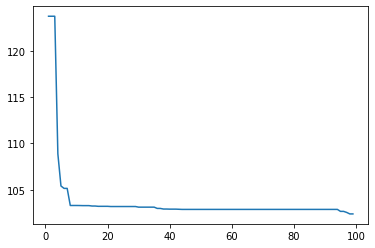

In [ ]:
print("Enter count of points (500 - 1000):")
count = int(input())

print("Enter count of individuals (1000 - 2000):")
count_ind = int(input())

print("Enter mean for Mutation:")
Em = float(input())

print("Enter varience for Mutation:")
Dm = float(input())

print("Enter count pair of parents:")
count_parents = int(input())

count_parents *= 2

print("# Enter maximal count of epochs:")
max_iter = int(input())

print("# Enter maximal count of epochs with same results:")
max_const_iter = int(input())

best_parents = generate_first_population(count_parents)

min, val = sys.float_info.max, sys.float_info.max
ind_best, same_iter = 1, 1
sum_time_cpu = 0
epochs = []
for epoch in range(1, max_iter):
  start_cpu = timer()
  children = make_children(best_parents, count_parents, count_ind, Em, Dm)
  sum_time_cpu += timer() - start_cpu

  arr_ind = fitness(count, count_ind, children)

  indexes, best_parents = select_best_parents(arr_ind, count_ind, count_parents, children)

  epochs.append([epoch, arr_ind[indexes[0]]])

  if arr_ind[indexes[0]] < min:
    min = arr_ind[indexes[0]]
    ind_best = epoch

  if val == arr_ind[indexes[0]]:
    same_iter += 1

  else:
    val = arr_ind[indexes[0]]
    same_iter = 1

  if same_iter >= max_const_iter:
    print("Same ", max_const_iter, " iterations")
  
print("min: ", min, "epoch: ", ind_best)

for j in range(N):
  print(best_parents[j], "*x^", j, end=' ')

print('\n')
print("CPU_time: ", sum_time_cpu/max_iter) 
plot_epochs_graph(epochs)